<a href="https://colab.research.google.com/github/swap-mitra/deep-learning/blob/main/Image_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [21]:
tf.test.is_built_with_cuda()

True

# Getting Data

In [22]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Exploring the Data

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
y_train.shape

(50000, 1)

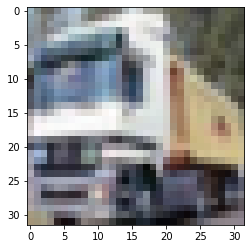

In [25]:
plt.imshow(X_train[1])

In [26]:
classes = ["airplane", "autombile", "bird", "cat", "deer", "dog", "frog", 
           "horse", "ship", "truck"]

In [27]:
classes[y_train[3][0]]

'deer'

# Scaling the Data

In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [29]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10,
                                                 dtype='float32')

y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10,
                                                 dtype='float32')

y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Running the Model

In [31]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8186 - accuracy: 0.3556
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6239 - accuracy: 0.4268
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5452 - accuracy: 0.4561
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4840 - accuracy: 0.4773
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4338 - accuracy: 0.4952
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3914 - accuracy: 0.5105
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3494 - accuracy: 0.5262
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3194 - accuracy: 0.5373
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2854 - accuracy: 0.5488
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.254

# Predictions

In [32]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

'ship'

In [33]:
classes[y_test[1][0]]

'ship'

In [34]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6816 - accuracy: 0.5439


[1.6816003322601318, 0.5439000129699707]